In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Recopilación de datos

In [96]:
data =  pd.read_csv('/workspaces/Gupir11-machine-learning/data/raw/winequality-red.csv', sep= ";")
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## EDA

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [98]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [99]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

## Conversion de Quality a Label

In [100]:
def convertir_quality(q):
    if q <= 4:
        return 0  # baja
    elif q <= 6:
        return 1  # media
    else:
        return 2  # alta
    
data["label"] = data["quality"].apply(convertir_quality)

data[["quality", "label"]].head(20)

,quality,label
0,5,1
1,5,1
2,5,1
3,6,1
4,5,1
5,5,1
6,5,1
7,7,2
8,7,2
9,5,1


In [101]:
data["label"].value_counts()

label
1    1319
2     217
0      63
Name: count, dtype: int64

## Seleccion de Columnas

In [102]:
feature_cols = ["fixed acidity", "volatile acidity", "citric acid","residual sugar", "chlorides","free sulfur dioxide", "total sulfur dioxide","density", "pH", "sulphates", "alcohol"]

## Split

In [103]:
X = data[feature_cols]
y = data["label"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18,
)

## Escalado

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Aplicacion del Modelo

In [106]:
model = KNeighborsClassifier()

# Entrenamiento
model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [107]:
# Predicción
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [108]:
accuracy = {'Accuracy Test': accuracy_score(y_test, y_pred_test),
            'Accuracy Train': accuracy_score(y_train, y_pred_train)}
accuracy

{'Accuracy Test': 0.840625, 'Accuracy Train': 0.8733385457388585}

## Hiperparametrizacion con Randomized

In [109]:
hiper_params = {'n_neighbors': [11, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35],
                'weights': ['uniform', 'distance'],
                                'p': [1, 2]}

In [ ]:
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=hiper_params,
                                   n_iter=50,
                                   cv=5,
                                   scoring='accuracy',
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
random_search.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 17}

In [111]:
random_search.best_score_

np.float64(0.8537990196078432)

In [112]:
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.8625

## Hiperparametrizacion con GridSearchCV

In [113]:
knn = KNeighborsClassifier()

grid = GridSearchCV(
    estimator=knn,
    param_grid=hiper_params,
    cv=5,                 
    scoring='accuracy',   
    n_jobs=-1            
)

In [114]:
grid.fit(X_train_scaled, y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [11, 17, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,29


In [115]:
f"Mejores hiperparámetros: {grid.best_params_}"

"Mejores hiperparámetros: {'n_neighbors': 29, 'p': 2, 'weights': 'distance'}"

In [116]:
f"Mejor accuracy de CV: {grid.best_score_}"

'Mejor accuracy de CV: 0.8678584558823529'

### Conclusion
Luego de probar tambien que metodo de hiperparametrizacion resultadaba mejor vemos que ofrece un mejor redimiento ya que su accuracy es de 86% mientras que el Randomized ofrece un 85%

por eso en este caso que los datos son pocos y podemos aprovehcar el Grid usaremos como modelo de hiperparametrizacion 

In [117]:
best_knn = grid.best_estimator_

y_pred = best_knn.predict(X_test_scaled)

In [118]:
f"Accuracy en test: {accuracy_score(y_test, y_pred)}"

'Accuracy en test: 0.871875'

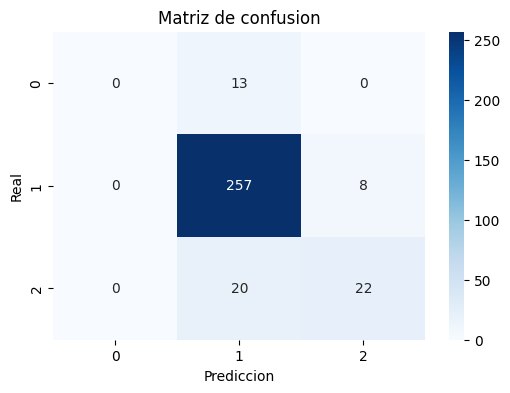

In [119]:
matrix_consusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(matrix_consusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusion')
plt.show()

### Conclusion
El modelo clasifica muy bien el cluster principal (1), pero tiene dificultades para diferenciar los clusters 0 y 2, probablemente porque están muy próximos entre sí o sus características se solapan

In [120]:
print("\nClassification report:\n", classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.89      0.97      0.93       265
           2       0.73      0.52      0.61        42

    accuracy                           0.87       320
   macro avg       0.54      0.50      0.51       320
weighted avg       0.83      0.87      0.85       320



## Optimizacion de k

In [121]:
results = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    results.append((k, acc))

results

[(1, 0.834375),
 (2, 0.81875),
 (3, 0.8375),
 (4, 0.85),
 (5, 0.840625),
 (6, 0.834375),
 (7, 0.834375),
 (8, 0.8375),
 (9, 0.828125),
 (10, 0.840625),
 (11, 0.834375),
 (12, 0.84375),
 (13, 0.8375),
 (14, 0.840625),
 (15, 0.834375),
 (16, 0.8375),
 (17, 0.8375),
 (18, 0.840625),
 (19, 0.840625),
 (20, 0.834375)]

In [122]:
best_k, best_acc = max(results, key=lambda x: x[1])
f"Mejores valores: {best_k}, {best_acc}"

'Mejores valores: 4, 0.85'

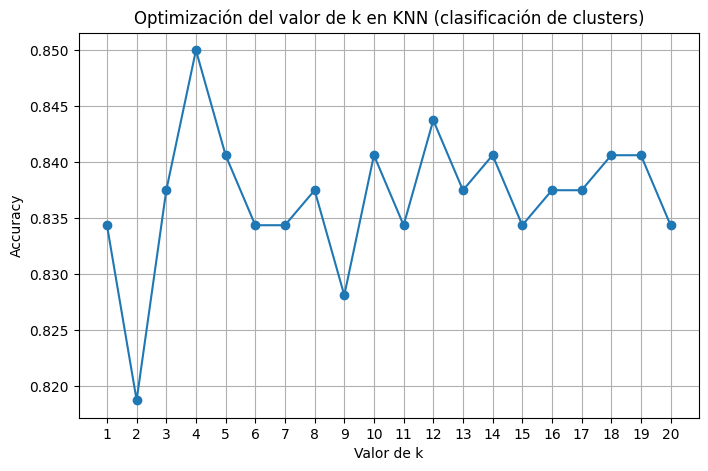

In [123]:
k_values, accuracies = zip(*results)

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Valor de k")
plt.ylabel("Accuracy")
plt.title("Optimización del valor de k en KNN (clasificación de clusters)")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

### Conclusion
El mejor valor de k es alrededor de 4, ya que ofrece la máxima accuracy observada, por lo que es la elección óptima para el modelo KNN en este problema.